# Heart Diasease Prediction

## Importing basic libraries for data handling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
heart_data = pd.read_csv("heart.csv")

## Data exploration

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### Data Shape

In [5]:
heart_data.shape

(1025, 14)

### Data info

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Data preprocessing

### Checking Missing values

In [7]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploratory Data analysis

### Histogram plots for Numerical variables

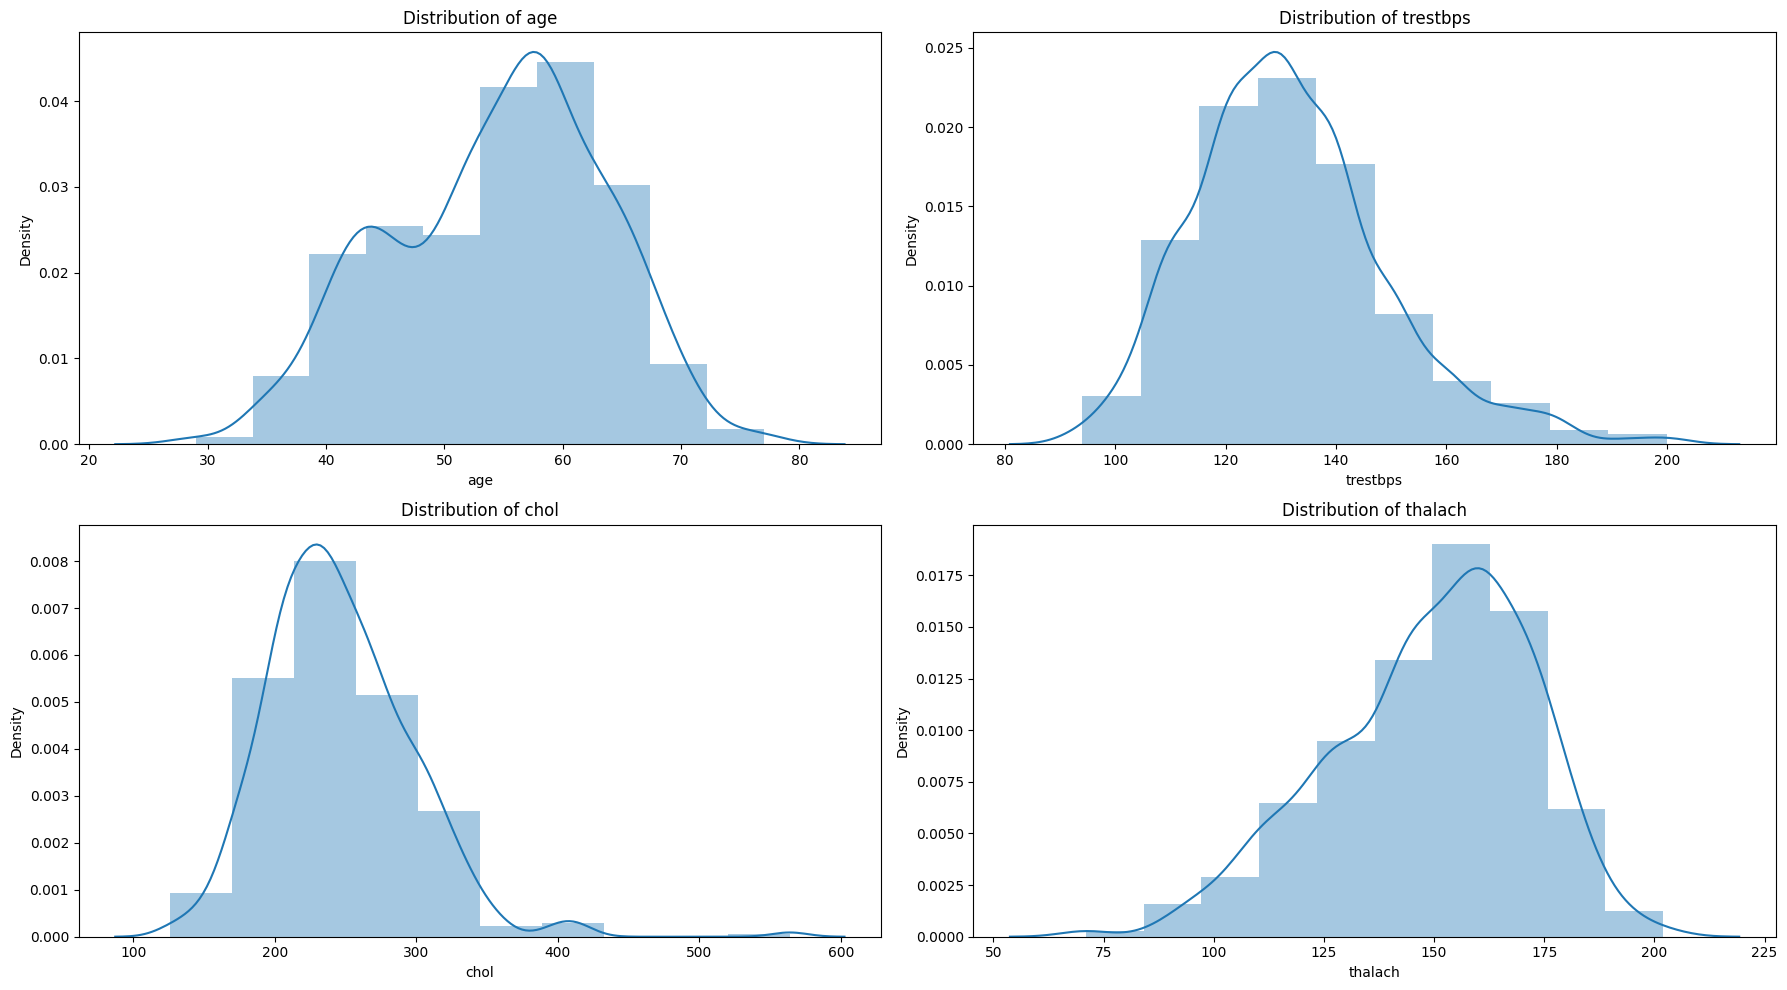

In [9]:
columns_num = ['age', 'trestbps', 'chol', 'thalach']

plt.figure(figsize=(18, 10))

for i, columns_num in enumerate(columns_num):
    plt.subplot(2, 2, i + 1)
    sns.distplot(heart_data[columns_num].dropna(), kde=True, bins=10)  
    plt.title(f'Distribution of {columns_num}')
    plt.xlabel(columns_num)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

### Distribution of heart diseases among patients

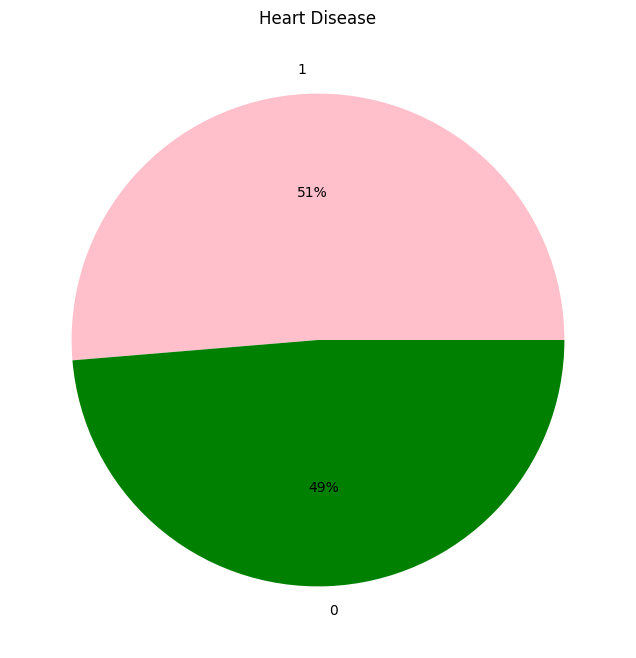

In [10]:
Heart_Disease_counts = heart_data["target"].value_counts()
plt.figure(figsize=(12,8))
plt.pie(Heart_Disease_counts, labels=Heart_Disease_counts.index, autopct='%0.0f%%',
        colors=['pink', 'green'])
plt.title('Heart Disease')
plt.show()

### Association between age and Blood pressure

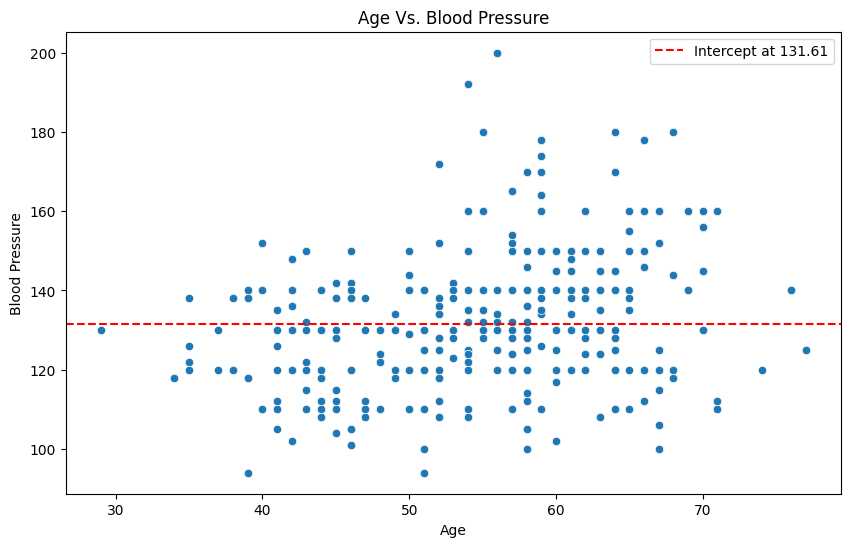

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=heart_data, x='age', y='trestbps')  

mean_blood_pressure = heart_data['trestbps'].mean()
plt.axhline(mean_blood_pressure, color='red', linestyle='--', label=f'Intercept at {mean_blood_pressure:.2f}')

plt.title('Age Vs. Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()

### Association between serum cholesterol and Maximum Heart Rate

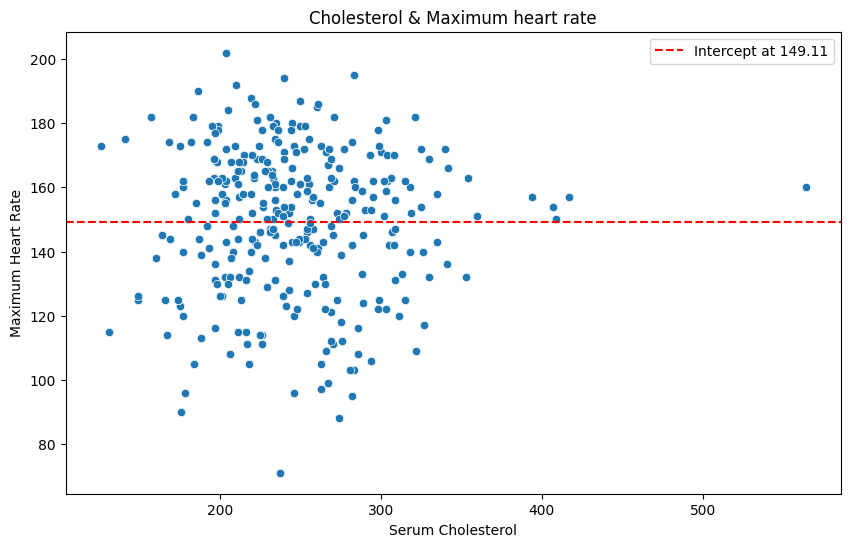

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=heart_data, x='chol', y='thalach')  

mean_blood_pressure = heart_data['thalach'].mean()
plt.axhline(mean_blood_pressure, color='red', linestyle='--', label=f'Intercept at {mean_blood_pressure:.2f}')

plt.title('Cholesterol & Maximum heart rate')
plt.xlabel('Serum Cholesterol')
plt.ylabel('Maximum Heart Rate')
plt.legend()
plt.show()

### Distribution of Age by Target (Heart attack or not)

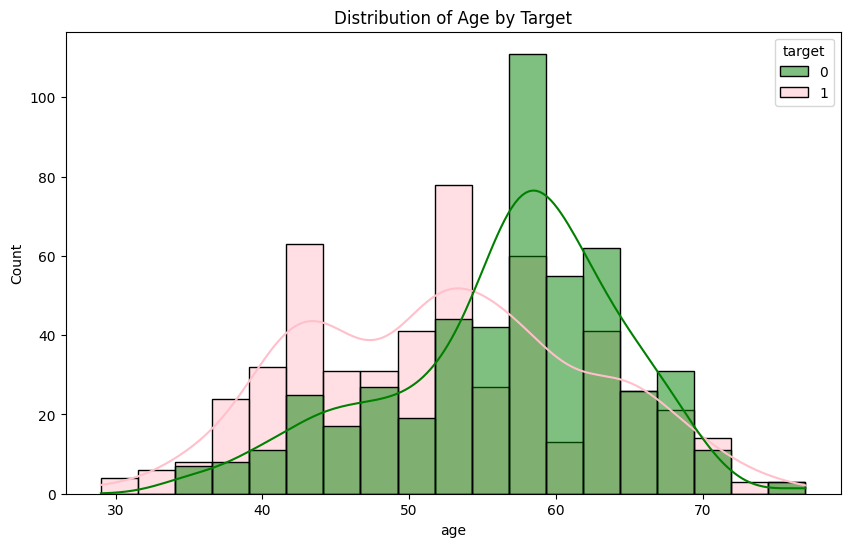

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=heart_data, x='age', hue='target', kde=True, palette=['green', 'pink'])
plt.title('Distribution of Age by Target')
plt.show()

### Correlation heatmap

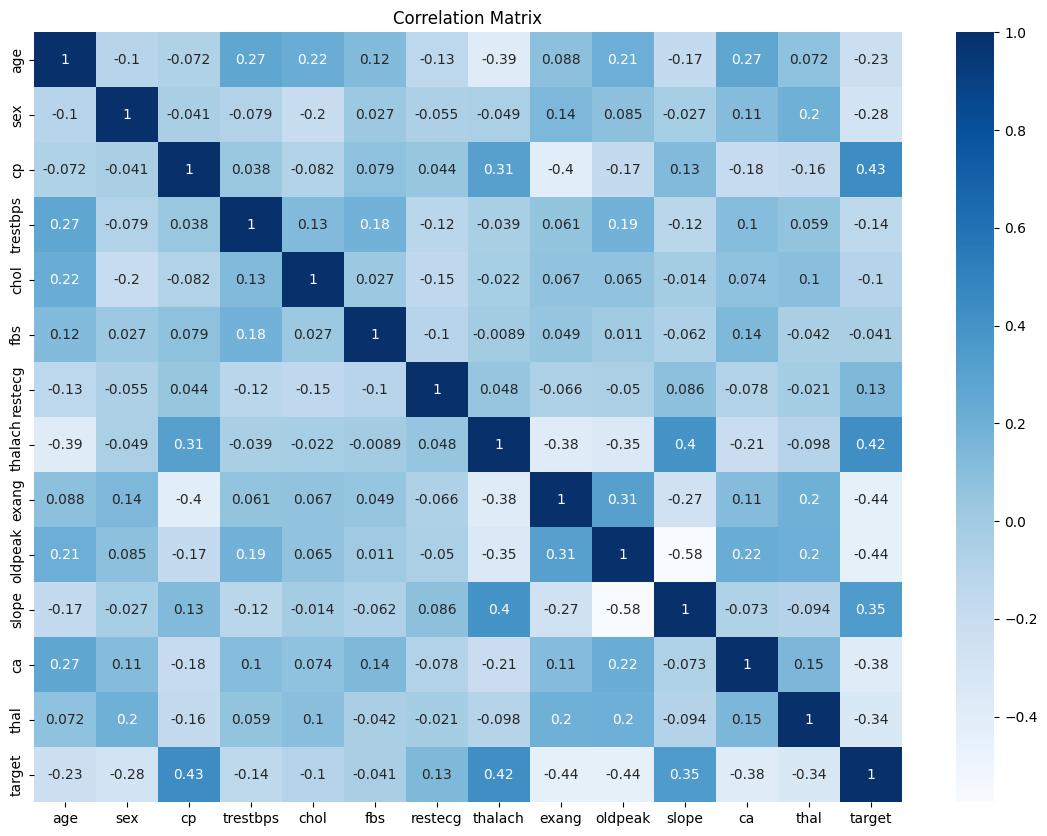

In [14]:
plt.figure(figsize=(14,10))
sns.heatmap( heart_data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

## Machine Learning Pipeline

### Target and Features

In [15]:
# Split data into features (X) and target variable (y)
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [16]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

## Data splitting

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [20]:
X_train.shape

(717, 13)

In [21]:
X_test.shape

(308, 13)

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 497 to 272
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       717 non-null    int64  
 1   sex       717 non-null    int64  
 2   cp        717 non-null    int64  
 3   trestbps  717 non-null    int64  
 4   chol      717 non-null    int64  
 5   fbs       717 non-null    int64  
 6   restecg   717 non-null    int64  
 7   thalach   717 non-null    int64  
 8   exang     717 non-null    int64  
 9   oldpeak   717 non-null    float64
 10  slope     717 non-null    int64  
 11  ca        717 non-null    int64  
 12  thal      717 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 78.4 KB


## Model 1: Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [24]:
# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

In [25]:
# Train the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# Predict on test set
y_pred_logreg = logreg.predict(X_test)

In [27]:
# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       150
           1       0.78      0.90      0.84       158

    accuracy                           0.82       308
   macro avg       0.83      0.82      0.82       308
weighted avg       0.83      0.82      0.82       308



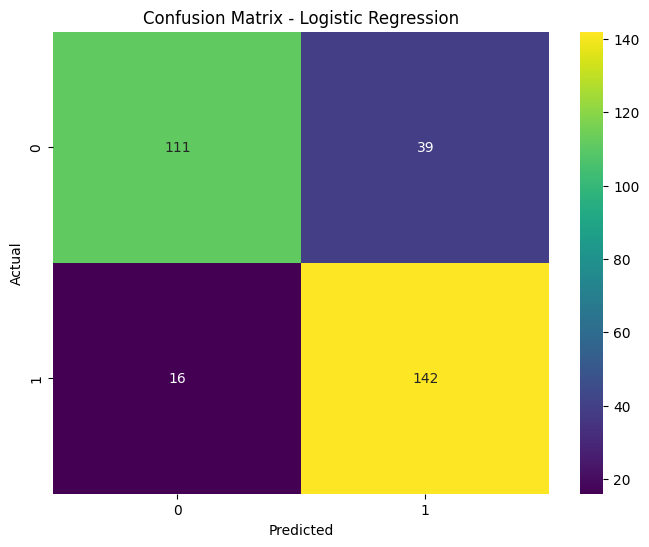

In [28]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

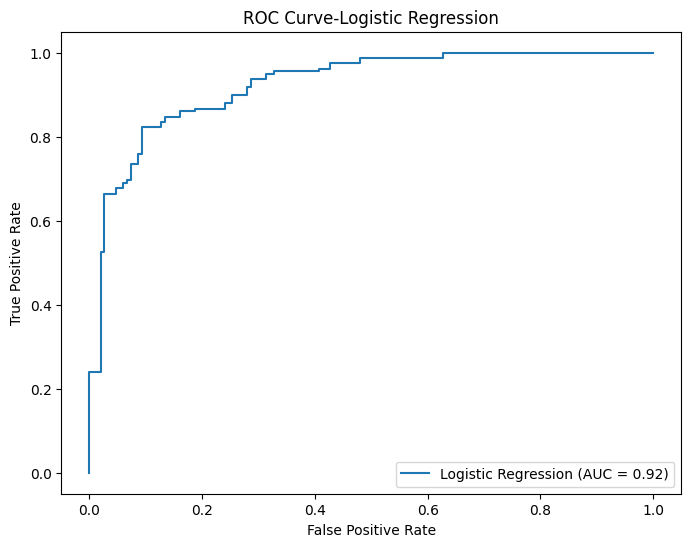

In [29]:
# Compute and plot ROC curve
y_proba_logreg = logreg.predict_proba(X_test)[:,1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
auc_logreg = roc_auc_score(y_test, y_proba_logreg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve-Logistic Regression')
plt.legend(loc='lower right')
plt.show()

## Model 2: XGBoost Classifier

In [30]:
from xgboost import XGBClassifier

In [31]:
# Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [32]:
# Train the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [33]:
# Predict on test set
y_pred_xgb = xgb.predict(X_test)

In [34]:
# Evaluate the model
print("XGBoost Classifier Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



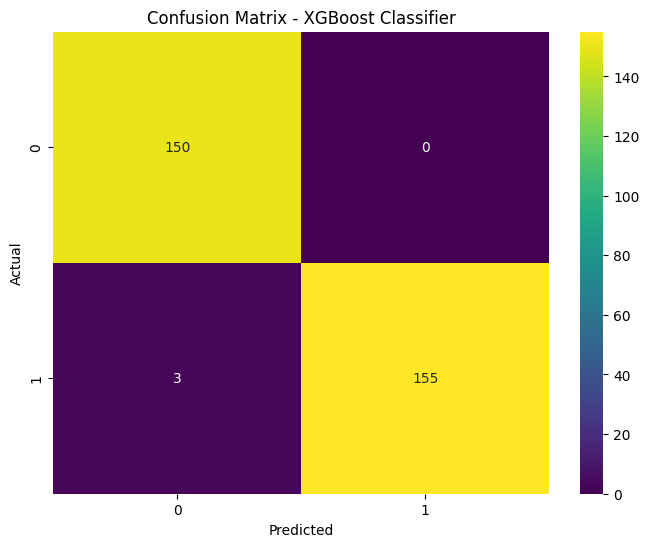

In [35]:
# Compute the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title('Confusion Matrix - XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

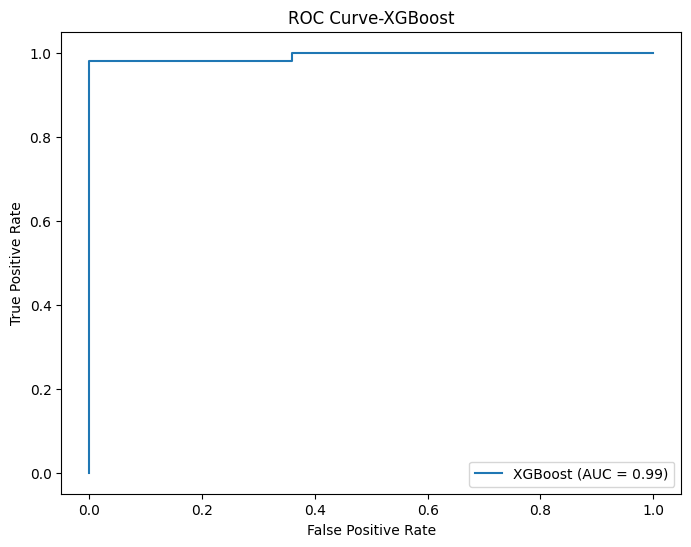

In [36]:
# Compute and plot ROC curve
y_proba_xgb = xgb.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve-XGBoost')
plt.legend(loc='lower right')
plt.show()

## Model 3: Multi-Layer Perceptron (MLP) Classifier

In [37]:
from sklearn.neural_network import MLPClassifier

In [38]:
# Initialize MLP Classifier
mlp = MLPClassifier(max_iter=5000)

In [39]:
# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=5000)

In [40]:
# Predict on test set
y_pred_mlp = mlp.predict(X_test)

In [41]:
# Evaluate the model
print("Multi-Layer Perceptron Classifier Classification Report:")
print(classification_report(y_test, y_pred_mlp))

Multi-Layer Perceptron Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       150
           1       0.84      0.88      0.86       158

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



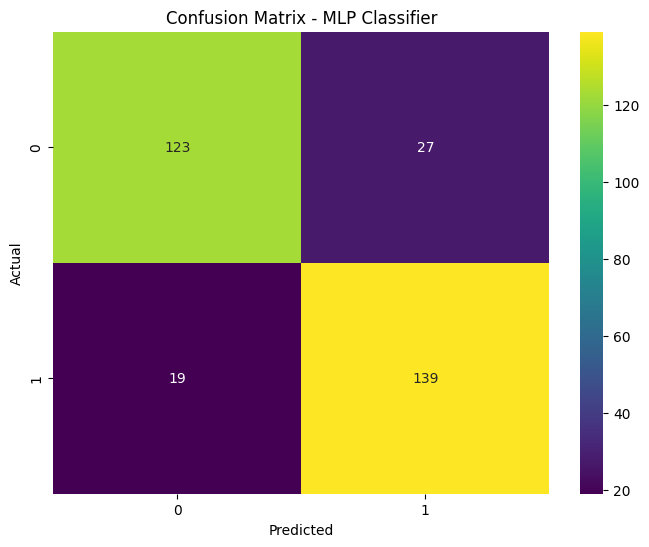

In [42]:
# Compute the confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title('Confusion Matrix - MLP Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

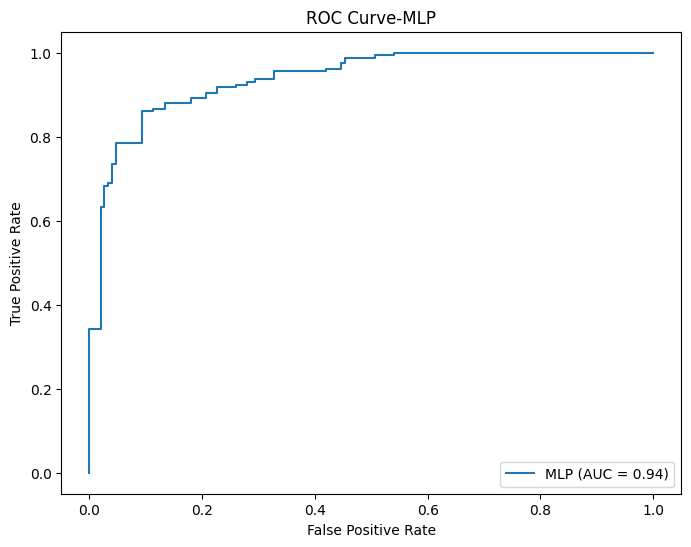

In [43]:
# Compute and plot ROC curve
y_proba_mlp = mlp.predict_proba(X_test)[:,1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_proba_mlp)
auc_mlp = roc_auc_score(y_test, y_proba_mlp)

plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve-MLP')
plt.legend(loc='lower right')
plt.show()

## Model Comparision

In [44]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg) * 100
accuracy_xgb = accuracy_score(y_test, y_pred_xgb) * 100
accuracy_mlp = accuracy_score(y_test, y_pred_mlp) * 100

# Accuracy values in a dictionary
accuracies = {
    'Logistic regression': accuracy_logreg,
    'XGBoost Classifier': accuracy_xgb,
    'MLP Classifier': accuracy_mlp
}

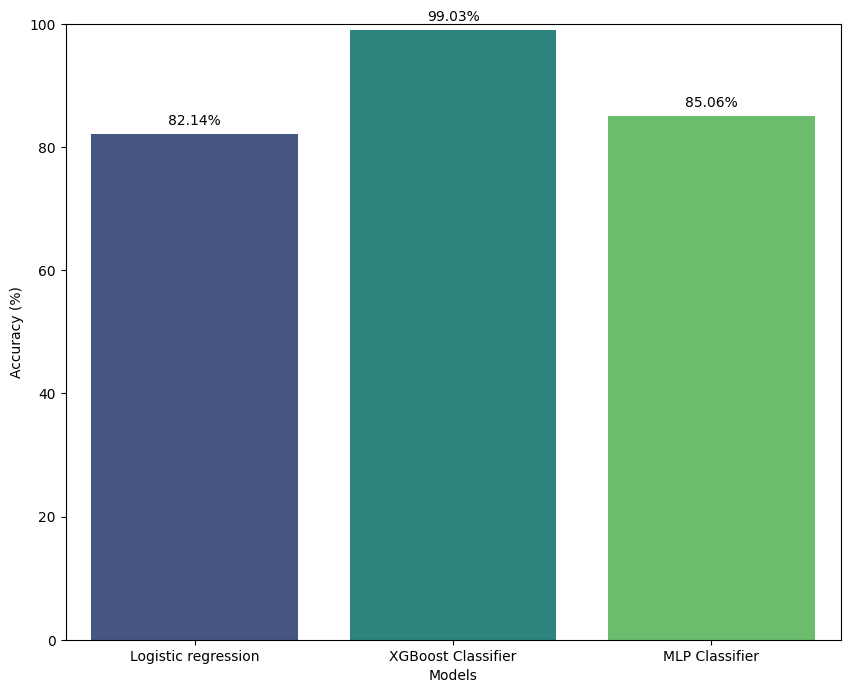

In [45]:
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

for index, row in accuracy_df.iterrows():
    plt.text(index, row['Accuracy'] + 1, f'{row["Accuracy"]:.2f}%', ha='center', va='bottom')

plt.show()

## Pickling the Model API

In [46]:
import pickle

In [47]:
pickle.dump(heart_data, open('heart_data.pkl', 'wb'))

In [48]:
pickle.dump(xgb, open('xgb.pkl', 'wb'))